### Participants

- Franck Armel Signe Talla (franck.signe-talla@polytechnique.edu)
- Styve Ngamou Monthe (styve.ngamou-monthe@polytechnique.edu)

In [678]:
# import packages
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [679]:
# download data

data = pd.read_csv('train.csv') # Train set
test_full = pd.read_csv("test-full.csv") # Test set


In [680]:
test_ff = pd.DataFrame(test_full.index + 1, columns = ["Id"])
test_ff.head()

,Id
0,1
1,2
2,3
3,4
4,5


### II- Exploratory Data Analysis

In [681]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


In [682]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [683]:
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,267008.526389,2748.649934,155.834524,16.556746,228.376521,51.311706,1717.977712,213.028836,218.865741,134.477116,...,0.043849,0.040939,0.001190,0.006812,0.000926,0.002116,0.049206,0.041931,0.030159,4.000000
std,179261.722330,419.009589,109.745372,8.534602,209.196381,61.520488,1330.263450,30.638406,22.797288,46.070054,...,0.204766,0.198156,0.034484,0.082257,0.030416,0.045957,0.216306,0.200439,0.171030,2.000066
min,5.000000,1877.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,52.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,103705.000000,2373.000000,65.000000,10.000000,67.000000,5.000000,760.000000,197.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,276034.500000,2754.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,398150.250000,3109.000000,257.000000,22.000000,330.000000,80.000000,2292.000000,236.000000,235.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,581005.000000,3850.000000,360.000000,50.000000,1376.000000,570.000000,6803.000000,254.000000,254.000000,251.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


#### Display distribution of features per Cover_Type

In [684]:
sns.set()

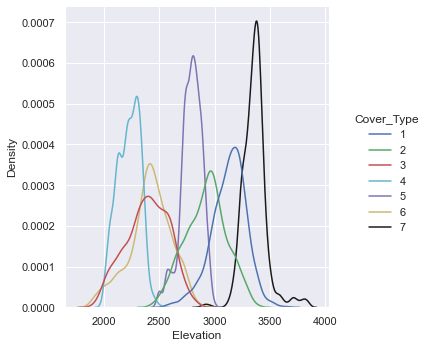

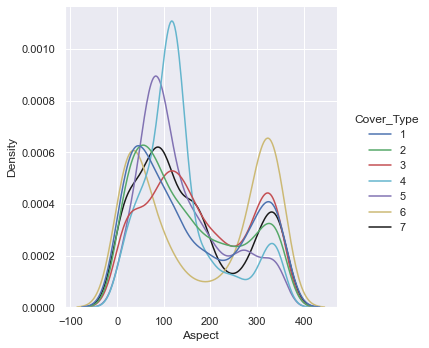

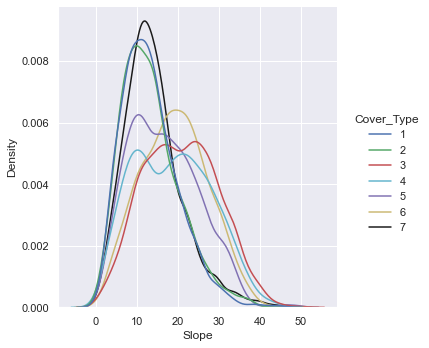

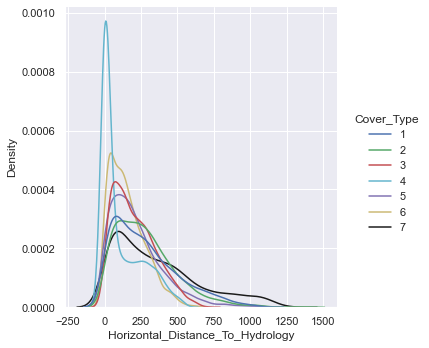

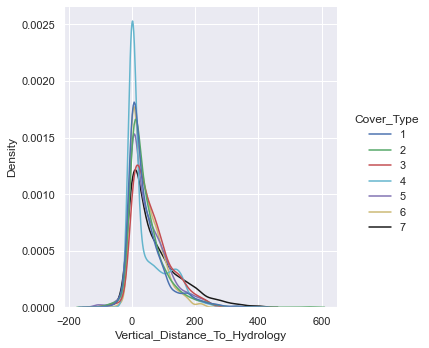

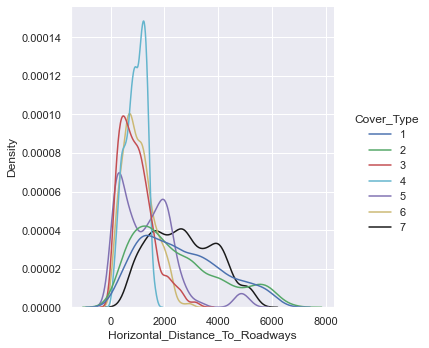

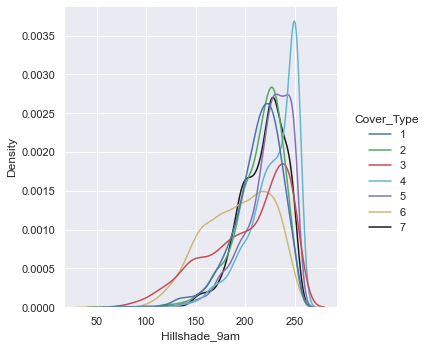

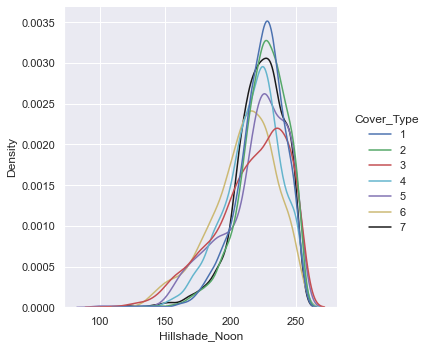

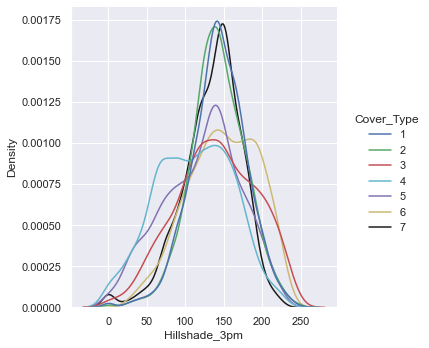

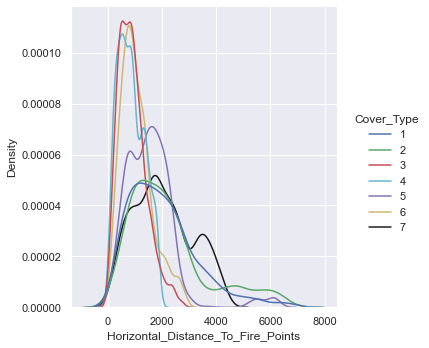

In [685]:
### distribution of features on train and test set
attribute = ["Elevation", "Aspect", "Slope","Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]

for column_ in attribute[:-1]:
    sns.displot( data, x = column_, kind = "kde",hue = "Cover_Type", palette=['b', 'g', 'r', 'c', 'm', 'y', 'k'])


We can see that Elevation is very relevent thant anothers features to distinguish differents Cover_Type.

#### Display repartition of Cover_Type 

In [686]:
data.Cover_Type.value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

<AxesSubplot:xlabel='Cover_Type', ylabel='Count'>

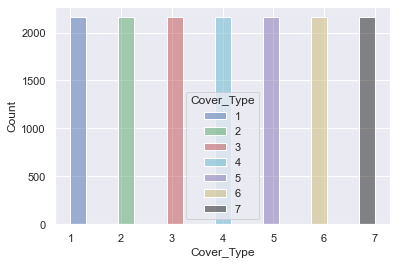

In [687]:
sns.histplot(data, x = "Cover_Type", hue = "Cover_Type",palette= ['b', 'g', 'r', 'c', 'm', 'y', 'k'])

>>> We see that we have the same number of values for all differents type of Cover_Type

#### Pearson Coefficients

Text(0.5, 1.05, 'Pearson Correlation')

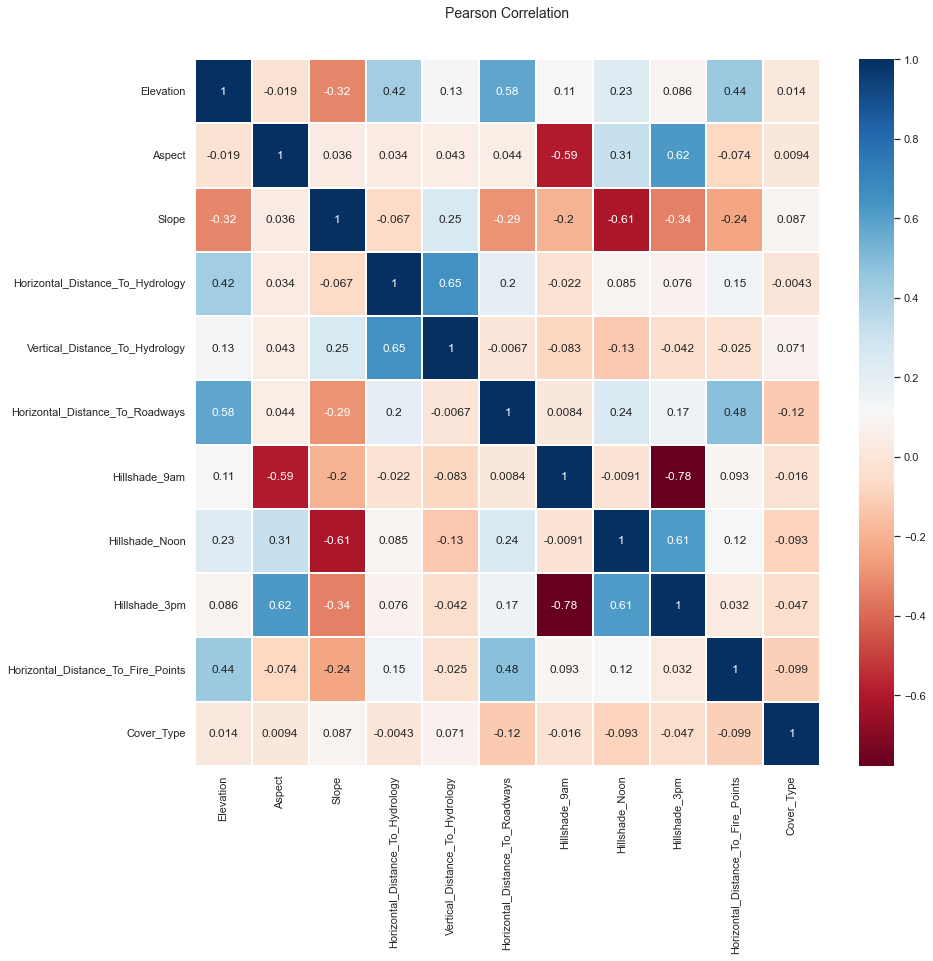

In [688]:
plt.figure(figsize=(14,13))

colormap = plt.cm.RdBu
sns.heatmap(data[attribute].corr(),linewidths=0.15,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation', y=1.05, size=14)

#### Matrix corralation

In [689]:
matrix_corr = data.copy().drop(columns= ["Id"]).corr()
matrix_corr["Cover_Type"].sort_values(ascending=  False)

Cover_Type                            1.000000
Soil_Type38                           0.254248
Soil_Type39                           0.234777
Soil_Type40                           0.199545
Soil_Type10                           0.140102
Wilderness_Area3                      0.137298
Soil_Type35                           0.090457
Slope                                 0.086536
Wilderness_Area4                      0.074817
Vertical_Distance_To_Hydrology        0.070615
Soil_Type37                           0.069080
Soil_Type17                           0.042376
Soil_Type5                            0.029799
Soil_Type13                           0.028677
Soil_Type14                           0.024875
Soil_Type36                           0.022832
Soil_Type1                            0.017423
Soil_Type16                           0.016646
Elevation                             0.014241
Soil_Type18                           0.014120
Soil_Type2                            0.009786
Aspect       

>>> Here we can directly see that Soil_Type15 doesn't have any corralation with Cover_Type and so we will delete it in feature engineering part.

>>> We don't have any Nan Value 

#### Outliers on numerical features

Identify Outliers and replace them by the mean of not outliers obervations

##### define Interquartile range, Lower and Upper Quartile
Q1 = data.quantile(0.25) 
$\newline$
Q3 = data.quantile(0.75)
$\newline$
IQR = Q3 - Q1

Outliers here are defined as observations that:

    - Fall below Q1 - 1.5*IQR , or

    - Above Q3 + 1.5*IQR


In [690]:
def outliers_(data):
    column = data.columns[1:11]
    for colum in column:
        Q1 = data[colum].quantile(0.25)
        Q3 = data[colum].quantile(0.75)
        IQR = Q3 - Q1
        data["Outliers"] = (data[colum]< Q1 - 1.5*IQR)  | (data[colum]> Q3 + 1.5*IQR)
        means = np.mean( data[data["Outliers"] == False][colum])
        data.loc[data["Outliers"] == True, colum] = means
        #data.loc[data["Outliers"] == True][colum] = means
        print("there are", sum(data["Outliers"]), "outliers in ", colum)
        data.drop(columns = ["Outliers"], axis = 1, inplace = True)
        

    return data

In [691]:
train_set = outliers_(data.copy())

there are 0 outliers in  Elevation
there are 0 outliers in  Aspect
there are 64 outliers in  Slope
there are 510 outliers in  Horizontal_Distance_To_Hydrology
there are 551 outliers in  Vertical_Distance_To_Hydrology
there are 781 outliers in  Horizontal_Distance_To_Roadways
there are 400 outliers in  Hillshade_9am
there are 406 outliers in  Hillshade_Noon
there are 144 outliers in  Hillshade_3pm
there are 669 outliers in  Horizontal_Distance_To_Fire_Points


In [692]:
test_set = outliers_(test_full.copy())

there are 15569 outliers in  Elevation
there are 0 outliers in  Aspect
there are 15316 outliers in  Slope
there are 14557 outliers in  Horizontal_Distance_To_Hydrology
there are 31463 outliers in  Vertical_Distance_To_Hydrology
there are 669 outliers in  Horizontal_Distance_To_Roadways
there are 17433 outliers in  Hillshade_9am
there are 15672 outliers in  Hillshade_Noon
there are 7832 outliers in  Hillshade_3pm
there are 31157 outliers in  Horizontal_Distance_To_Fire_Points


Text(0.5, 1.05, 'Pearson Correlation')

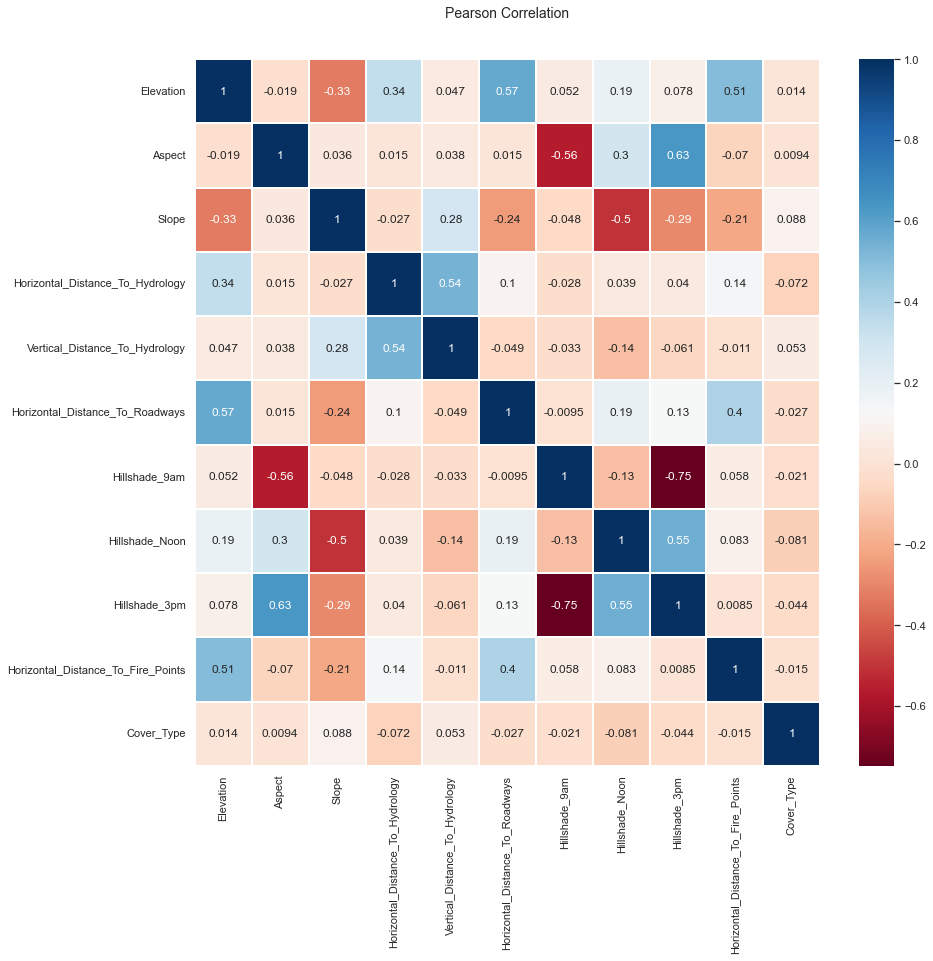

In [693]:
plt.figure(figsize=(14,13))

colormap = plt.cm.RdBu
sns.heatmap(train_set[attribute].corr(),linewidths=0.15,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation', y=1.05, size=14)

In [694]:
new_matrix_corr = train_set.copy().drop(columns=["Id"]).corr()

In [695]:
new_matrix_corr["Cover_Type"].sort_values(ascending= False)

Cover_Type                            1.000000
Soil_Type38                           0.254248
Soil_Type39                           0.234777
Soil_Type40                           0.199545
Soil_Type10                           0.140102
Wilderness_Area3                      0.137298
Soil_Type35                           0.090457
Slope                                 0.087510
Wilderness_Area4                      0.074817
Soil_Type37                           0.069080
Vertical_Distance_To_Hydrology        0.052560
Soil_Type17                           0.042376
Soil_Type5                            0.029799
Soil_Type13                           0.028677
Soil_Type14                           0.024875
Soil_Type36                           0.022832
Soil_Type1                            0.017423
Soil_Type16                           0.016646
Elevation                             0.014241
Soil_Type18                           0.014120
Soil_Type2                            0.009786
Aspect       

>> These Outliers can lead to significant learning errors especially for algorithms like KNN

>>so it's relevant to remove them.

>> And the most important problèm is that, by do this operation we can greatly change the correlation between the features.

#### Display Outliers distribution per Cover_Type

>We will show boxplot(according to IQR technique) of the features which have the three firsts number of outliers.

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Roadways'>

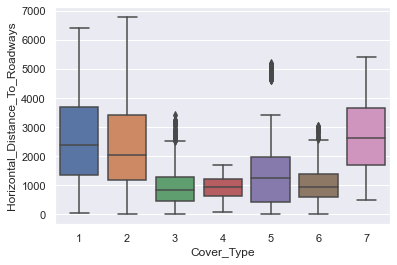

In [696]:
sns.boxplot(data=data, y="Horizontal_Distance_To_Roadways", x = "Cover_Type")

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Fire_Points'>

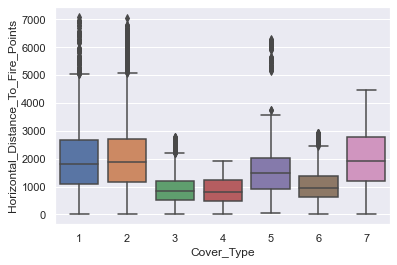

In [697]:
sns.boxplot(data=data, y="Horizontal_Distance_To_Fire_Points", x = "Cover_Type")

<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

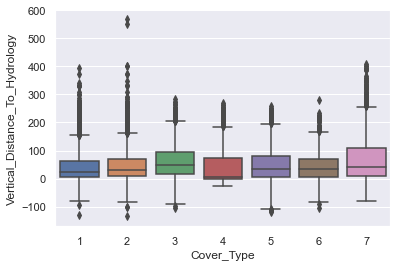

In [698]:
sns.boxplot(data=data, y="Vertical_Distance_To_Hydrology", x = "Cover_Type")

>>> So the relevant maner to manage outliers could be to replace them by the mean of non-outliers according to the same Cover_Type

### III- Feature Engineering 

#### Add some relevant features 

In [699]:
def transform_(data):
    # drop Soil_Type15 
    #data.drop(columns= ["Soil_Type15"])
    # drop Soil_Type15 
    #data = data.drop(columns= ["Soil_Type15"])


    # degree to hydrology
    data["Angle_to_Hydrology"] = np.arctan( (data["Vertical_Distance_To_Hydrology"] + 0.0001) / 
    (data["Horizontal_Distance_To_Hydrology"] + 0.0001) ) # to avoid division by zero i added 0.0001
    # degree_slope_to_Hydrology
    data["Degree_slope_to_Hydrology"] = data["Angle_to_Hydrology"] + data["Slope"]
    # Distance to hydrology
    data["Distance_to_Hydrology"] = (data["Vertical_Distance_To_Hydrology"]**2 + data["Horizontal_Distance_To_Hydrology"]**2 )**0.5
    # Mean_Vertical_Elevation_to_Hydrology
    data["Mean_Vertical_Elevation_to_Hydrology"] = (data["Elevation"] + data["Vertical_Distance_To_Hydrology"])/2
    # Mean_Distance_to_Hydrology_Roadways
    data["Mean_Distance_Roadways_to_Hydrology"] = (data["Horizontal_Distance_To_Roadways"] + data["Horizontal_Distance_To_Hydrology"])/2
    # Mean_Distance_Fire_points_to_Hydrology
    data["Mean_Distance_Fire_points_to_Hydrology"] = (data["Horizontal_Distance_To_Fire_Points"] + data["Horizontal_Distance_To_Hydrology"])/2
    # Mean_Distance_Fire_points_Roadways
    data["Mean_Distance_Fire_points_Roadways"] = (data["Horizontal_Distance_To_Fire_Points"] + data["Horizontal_Distance_To_Roadways"])/2
    # Elevation_Vertical_Distance_To_Hydrology
    data["Elevation_Vertical_Distance_To_Hydrology"] = data["Elevation"] + data["Vertical_Distance_To_Hydrology"]
    # Wilderness
    #data["willderness_sum"] = data["Wilderness_Area1"] + data["Wilderness_Area2"] + data["Wilderness_Area3"] + data["Wilderness_Area4"]
    # difference
    data["Horizontal_Distance_FirePoint_to_Hydrology"] = abs( data["Horizontal_Distance_To_Fire_Points"] - data["Horizontal_Distance_To_Hydrology"])
    data["Horizontal_Distance_Roadways_to_Hydrology"] = abs( data["Horizontal_Distance_To_Hydrology"] - data["Horizontal_Distance_To_Roadways"])
    data["Roadways_Distance_FirePoint_to_Hydrology"] = abs( data["Horizontal_Distance_To_Fire_Points"] - data["Horizontal_Distance_To_Roadways"])
    data["Vertical_Elevation"] = abs(data["Elevation"] - data["Vertical_Distance_To_Hydrology"])
    data["Mean_Horizontal_Distance"] = (data["Horizontal_Distance_To_Fire_Points"] +data["Horizontal_Distance_To_Hydrology"] + data["Horizontal_Distance_To_Roadways"] )/3
    data["Vertical_Distance_to_Hydrology"] = np.tan(data["Slope"])*data["Horizontal_Distance_To_Hydrology"]
    data["Vertical_Distance_to_FirePoint"] = np.tan(data["Slope"])*data["Horizontal_Distance_To_Fire_Points"]
    data["Vertical_Distance_to_Roadways"] = np.tan(data["Slope"])*data["Horizontal_Distance_To_Roadways"]

    return data
    

>>>We will use the follow functions to handle the one-hot matrix formed by Soil_Type and Wilderness_Area, and try to transform them in just one column, in other to reduice number of Soil_Type feature while keeping the same information

In [700]:
def split_numbers_chars(row):
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

>>> Here, we noticed that if we consider the featues as a vector, with geometrical interpretation we considered that by multiplying some features (vectors) negatively correlated to the Cover_type by -1 then they would allow the model to learn better.

In [701]:
# Use Corralation at our advantages

matrix_corr_ = data.corr()
correlation = matrix_corr_["Cover_Type"].fillna(0).sort_values(ascending = False)
for i, elt in enumerate(correlation.values):
    if elt < 0:
        break
attribute = correlation.keys()[i:]

for colon in attribute:
    data["-"+colon] = - data[colon]
    test_full["-"+ colon] = -test_full[colon]

In [702]:
# train
reverse_one_hot_encode(data, 16, 56, "Soil_Type")
data = data.drop(columns= ["Id"])
idx = np.where( data.columns == "Wilderness_Area1") 
idx = idx[0].item() + 1
reverse_one_hot_encode(data, idx, idx + 4,"Wilderness_Area")
train_set = transform_(data)
# test
test_full = test_full.drop(columns=["Id"])
reverse_one_hot_encode(test_full, 16, 56, "Soil_Type")
reverse_one_hot_encode(test_full, idx, idx + 4,"Wilderness_Area")
test_full = transform_(test_full)

In [703]:
# We have deleted all Soit_Type feature in train and test set after our last transformations

for i in range(1, 41):
    train_set = train_set.drop(columns=["Soil_Type" + str(i)])
    test_full = test_full.drop(columns= ["Soil_Type" + str(i)])

#### Split&Rescalling Train and Test set

> To do so we tried to divide keeping the same proportion of data and their distribution by Cover_Type 

In [704]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train_set, train_set["Cover_Type"]):
    strat_train_set = train_set.loc[train_index]
    strat_test_set = train_set.loc[test_index]

In [705]:
labels_train_set = strat_train_set["Cover_Type"]
X_train_set = strat_train_set.drop(columns= ["Cover_Type"])
labels_test_set = strat_test_set["Cover_Type"]
X_test_set = strat_test_set.drop(columns= ["Cover_Type"])

> Rescalling data

In [706]:
# create scaler
scaler = StandardScaler()
# transform data 
X_train_set = scaler.fit_transform(X_train_set, labels_train_set )

X_test_set = scaler.transform(X_test_set)

# for test_full
test_f = scaler.transform(test_full)

### IV- Machine Learning Model

Here we trained different models like:
- ExtraTreesClassifier
- RandomForestClassifier
- LGBMClassifier
- KNeighborsClassifier
- AdaBoostClassifier
- XGBClassifier

> Here we want to fine-tune the parameters of our model

In [707]:
# Number of trees
n_estimators = [50, 100, 300, 500, 1000]

# Minimum number of samples required to split an internal node.
min_samples_split = [2, 3, 5, 7, 9]

# Minimum number of samples required to be at a leaf node.
min_samples_leaf = [1, 2, 4, 6, 8]

# Number of features 
max_features = ['auto','sqrt',  None] 

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [708]:
# ExtraTrees
extr_clf = ExtraTreesClassifier(random_state=42)

# create Randomized search object
random_cv_extra = RandomizedSearchCV(estimator=extr_clf,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True, 
                               random_state=42)

In [709]:
# Fit on the all training data using random search object
random_cv_extra.fit(X_train_set, labels_train_set.to_numpy())

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=1)

In [710]:
# Best Extratrees parameters
random_cv_extra.best_estimator_

ExtraTreesClassifier(random_state=42)

In [711]:
# random forest
rdf_clf = RandomForestClassifier(random_state = 42)
random_cv_rdf = RandomizedSearchCV(estimator = rdf_clf,
                                    param_distributions = hyperparameter_grid,
                                    cv = 5,
                                    n_iter = 20,
                                    scoring = 'accuracy',
                                    n_jobs = -1,
                                    verbose = 1,
                                    return_train_score = True,
                                    random_state = 42)

In [ ]:
# Fit on the all training data using random search object
random_cv_rdf.fit(X_train_set, labels_train_set.to_numpy())

In [ ]:
# Best random forest parameters
random_cv_rdf.best_estimator_

In [715]:
# Lightgbm

gbm = lgb.LGBMClassifier(n_estimators=300,
                         num_class=8,
                         num_leaves=25,
                         learning_rate=5,
                         min_child_samples=20,
                         bagging_fraction=.3,
                         bagging_freq=1,
                         reg_lambda = 10**4.5,
                         reg_alpha = 1,
                         feature_fraction=.2,
                         num_boost_round=8000,
                         max_depth=-1,
                         device="cpu",
                         n_jobs=-1,
                         silent=-1,
                         verbose=-1)

random_cv_lgb = RandomizedSearchCV(estimator=gbm,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True, 
                               random_state=42)

In [ ]:
# Fit on the all training data using random search object
random_cv_lgb.fit(X_train_set, labels_train_set.to_numpy())

In [ ]:
# Best Lightgbm parameters
random_cv_lgb.best_estimator_

In [716]:
# K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

In [717]:
# AdaBooster
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=10), n_estimators=500,
algorithm="SAMME.R", learning_rate=0.5)


In [718]:

#Xgbooster
xgb_clf = XGBClassifier(n_estimators = 1000, max_depth = 12, eta = 0.1, subsample = 0.5, olsample_bytree = 0.5,scale_pos_weight=99, random_state = 42)

### V - Train Part

In [726]:
# Evaluation function using cross validation 

def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    skfolds = StratifiedKFold(n_splits=3,shuffle=True, random_state=42)
    confusion = np.zeros((7, 7))
    for train_index, test_index in skfolds.split(X_train, y_train):

        X_train_folds = X_train.iloc[train_index]
        y_train_folds = y_train.iloc[train_index]
        X_test_fold = X_train.iloc[test_index]
        y_test_fold = y_train.iloc[test_index]
        model.fit(X_train_folds, y_train_folds)
        y_pred = model.predict(X_test_fold)
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    confusion += confusion_matrix(Y_valid, y_predicted) 
    return accuracy_score(Y_valid, y_predicted), confusion

#### After having refined the parameters, we obtained following

In [720]:
# models

# ExtraTreesClassifier
xrf_classifier_w_random_search = ExtraTreesClassifier(n_estimators=1000, 
                                                     max_features = 'auto',
                                                     min_samples_split=3,
                                                     random_state=42)

# RandomForestClassifier
rdf_clf = RandomForestClassifier(n_estimators=1000, max_features='sqrt',
         min_samples_split=2)

#AdaBoostClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=10), n_estimators=500,
algorithm="SAMME.R", learning_rate=0.5)

#Xgbooster
xgb_clf = XGBClassifier(n_estimators = 1000, max_depth = 12, eta = 0.1, subsample = 0.5, olsample_bytree = 0.5,scale_pos_weight=99, random_state = 42)

#### In order to imporve the learning, we try to use Voting Classifier and Stacking technique

### Voting Classifier

>> The mail goal is to aggregate the results of different models used (using the principle of the law of large numbers )

In [721]:
# Voting Classifier
voting_clf = VotingClassifier(
    estimators = [('xrf',extr_clf ),  ('rdf', rdf_clf)], voting = 'hard'
)

###  Stacked generalization

>> Here we construct layers of model so that the next layer paid more attentient in misclassifier data by the previous layer.

In [722]:
# first layer

estimators = [('xrf',xrf_classifier_w_random_search ),  ('rdf', rdf_clf) ]#('ada', ada_clf ), ('rdf', rdf_clf)]

>>> The final_estimator will use the predictions of the estimators as input

In [723]:
# second layer

final_estimator = GradientBoostingClassifier(n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features='sqrt',
     random_state=42)
#final_estimator = DecisionTreeClassifier(max_depth=20, min_samples_split=3,
#     random_state=42)

In [724]:
stack_model = StackingClassifier(
    estimators = estimators,
    final_estimator= final_estimator
)

In [ ]:
xrf_accuracy_opt_w_rand_search, confusion = fit_evaluate_model(stack_model, pd.DataFrame(X_train_set),pd.DataFrame(labels_train_set), pd.DataFrame(X_test_set), pd.DataFrame(labels_test_set))

In [729]:
print("Accuracy score after hyperparameter tuning:",xrf_accuracy_opt_w_rand_search)

Accuracy score after hyperparameter tuning: 0.9027777777777778


<AxesSubplot:>

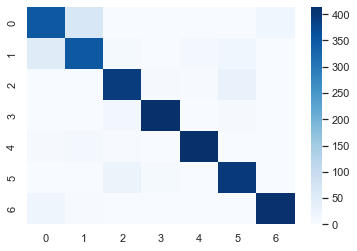

In [730]:
sns.heatmap(confusion, cmap="Blues")

### VI- Submission

In [ ]:
def submission(model, test, test_full,idx):
    subm = model.predict(test)
    subm = pd.DataFrame(subm, columns= ['Cover_Type']) 
    data1 = data1 = pd.DataFrame(test_full.Id)
    submit_new = pd.concat([data1, subm], axis = 1)
    submit_new.to_csv("full_submission_"+ str(idx)+".csv", index=False)

In [ ]:
# Just when we include XGBooster 
def submission_(model, test,test_full ,idx):
    subm = model.predict(test)
    subm = pd.DataFrame(subm, columns= ['Cover_Type']) + 1
    data1 = pd.DataFrame(test_full.Id)
    submit_new = pd.concat([data1, subm], axis = 1)
    submit_new.to_csv("full_submission_"+ str(idx)+".csv", index=False)

In [542]:
submission(stack_model, test_f, test_ff,16)

### VII- Deep Learning Approach

In [ ]:
import tensorflow as tf
import torch

import os
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

In [ ]:
train = pd.read_csv("train.csv")
sns.set_theme(style='darkgrid')

In [ ]:
numerical_data = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

Soil_type = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39']

Wilderness_Area = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3']

features = numerical_data + Soil_type + Wilderness_Area + [ 'Distance_To_Hydrology']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train, train['Cover_Type'], stratify=train['Cover_Type'],test_size=0.3)

First we look at the distribution of the data

In [ ]:
plt.figure()
X_train[numerical_data].hist(figsize=(15,15), bins = 70)
plt.show()

In [ ]:
X_train['Hillshade_3pm'] = X_train['Hillshade_3pm'].apply(lambda x : np.log(1 + x))
X_train['Hillshade_9am'] = X_train['Hillshade_9am'].apply(lambda x : np.log(1 + x))
X_train['Hillshade_Noon'] = X_train['Hillshade_Noon'].apply(lambda x : np.log(1 + x))
X_train['Distance_To_Hydrology'] = (X_train["Vertical_Distance_To_Hydrology"]**2 + X_train["Horizontal_Distance_To_Hydrology"]**2)**1/2

In [ ]:
X_val['Hillshade_3pm'] = X_val['Hillshade_3pm'].apply(lambda x : np.log(1 + x))
X_val['Hillshade_9am'] = X_val['Hillshade_9am'].apply(lambda x : np.log(1 + x))
X_val['Hillshade_Noon'] = X_val['Hillshade_Noon'].apply(lambda x : np.log(1 + x))
X_val['Distance_To_Hydrology'] = (X_val["Vertical_Distance_To_Hydrology"]**2 + X_val["Horizontal_Distance_To_Hydrology"]**2)**1/2

### data normalisation
we normalised the data (numerical features) before feeding it to the network

In [ ]:
scaler = StandardScaler() # we used a standard sacler to normalisethe numerical data
X_train[numerical_data] = scaler.fit_transform(X_train[numerical_data]) #we fit the scaler on the training set

X_val[numerical_data] = scaler.transform(X_val[numerical_data]) # we traansform the validation set using caracteristics of the 
# training set distribution

In [ ]:
X_train = X_train[features]
X_val = X_val[features]

### Creation of the model:
the best model we created used:
- 3 hiddens layers of size 64, 64 and 10 with relu activation function and batch normalisation
- a softmax layer with 7 inputs
- we usedCrossEntropy as loss function
- we used the Adam optimizer to speed the learning

In [ ]:
input_size = X_train.shape[1]
hidden_sizes = [64, 64, 10]
n_classes = 7
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0], bias=False),
                      nn.BatchNorm1d(hidden_sizes[0]),
                      nn.ReLU(),
                      #nn.Dropout(0.5),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1], bias=False),
                      nn.BatchNorm1d(hidden_sizes[1]),
                      nn.ReLU(),
                      #nn.Dropout(0.5),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2], bias=False),
                      nn.BatchNorm1d(hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], n_classes, bias=True),
                      nn.Softmax(dim= 1)
)
model = model.to(device)

### Dataloader construction

In [ ]:
# definition of the batch size
batch_size = 64

# construction of the dataloader of the train set
trainset = TensorDataset(torch.tensor(X_train.values.astype(np.float32)), torch.tensor(y_train.values - 1))
train_dataloader = DataLoader(trainset, batch_size = batch_size, shuffle = True)

# construction of the dataloader of the validation set
valset = TensorDataset(torch.tensor(X_val.values.astype(np.float32)), torch.tensor(y_val.values - 1))
val_dataloader = DataLoader(valset, batch_size=batch_size, shuffle=True)

# the loss fuction used for the training is the cross entropy
loss_func = nn.CrossEntropyLoss() 


In [ ]:
def evaluate(dataloader, model):
    """
        this unction is used to evaluate the model on the validation set
    """
    total_loss = 0
    for step, batch in enumerate(dataloader):
        model.eval()
        input_id, label = batch
        input_id = input_id.to(device)
        output = model(input_id)
        loss = loss_func(output, label)
        total_loss += loss.item()
      
    return total_loss/len(dataloader)

In [ ]:
def eval_prediction(dataloader, model):
    """
        this function is used to compute the accuracy
    """
    acc = 0
    for step, batch in enumerate(dataloader):
        model.eval()
        input_id, label = batch
        input_id = input_id.to(device)
        output = model(input_id)
        acc += torch.sum(1.0*(torch.argmax(output, dim=1)==label)) 
      
    l = dataloader.dataset.tensors[0].shape[0]
    return acc/l

In [ ]:
training_stats = []
val_stats = []
lr_rate = 0.0001
# optimizer for speeding the learning
optimizer = torch.optim.Adam(model.parameters(), lr=lr_rate)

#### Training step

In [ ]:
for epoch in range(1000):
    print("epoch = " + str(epoch+1))
    total_train_loss = 0
    total_val_loss = 0
    model.train() 
    for step, batch in enumerate(train_dataloader):
        if step%40 == 0 and not step == 0 :
            print(f' Batch {step} of {len(train_dataloader)}.')
            
        X, label = batch
        X = X.to(device)
        
        model.zero_grad()
        output = model(X)
        
        loss = loss_func(output, label)
        total_train_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        

    training_stats.append( {'epoch' : epoch+1,'training loss' : total_train_loss/len(train_dataloader)})
    print("loss = "+str(total_train_loss/len(train_dataloader)))  
    print("val_loss = " + str(evaluate(val_dataloader, model)))

### Prediction Step

In [ ]:
test = pd.read_csv("test-full.csv")

In [ ]:
test['Hillshade_3pm'] = test['Hillshade_3pm'].apply(lambda x : np.log(1 + x))
test['Hillshade_9am'] = test['Hillshade_9am'].apply(lambda x : np.log(1 + x))
test['Hillshade_Noon'] = test['Hillshade_Noon'].apply(lambda x : np.log(1 + x))
test['Distance_To_Hydrology'] = (test["Vertical_Distance_To_Hydrology"]**2 + test["Horizontal_Distance_To_Hydrology"]**2)**1/2

In [ ]:
test[numerical_data] = scaler.transform(test[numerical_data])

In [ ]:
X_test = test[features]

In [ ]:
testset = TensorDataset(torch.tensor(X_test.values.astype(np.float32)))
test_dataloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [ ]:
def prediction(dataloader, model):
    pred = []
    for step, batch in enumerate(dataloader):
        model.eval()
        input_id,= batch
        input_id = input_id.to(device)
        output = model(input_id)
        output = torch.argmax(output, dim = 1)
        pred = pred + output.tolist()
    
    return np.array(pred) + 1

In [ ]:
test_pred = prediction(test_dataloader,model)

In [ ]:
idx = 2

In [ ]:
test_pred = pd.DataFrame(test_pred, columns= ['Cover_Type'])
id_ = pd.DataFrame(test.Id)
submit_new = pd.concat([id_, test_pred], axis = 1)
submit_new.to_csv("full_submission_"+ str(idx)+".csv", index=False)

The acuracy with the deep learning approach was not satisfaying.
- we used the cross entropy as loss function
- we tried differents architectures (we changed the number of layers, the number of neurones by layers): we had worst results with deeper model, may be because of the small amount of data we had.
- we tried neural network with batch normalisation on differents layers
- we tried droup out in order to improve the learning

In [ ]:
losses = [elt['training loss'] for elt in training_stats]
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(losses)), losses)
plt.title('loss fuction according to epochs')
plt.xlabel("epochs")
plt.ylabel("loss")

- we used the learning rate decay to improve the leaning of our model, without any improvement